In [19]:
import pandas as pd
import shap
import joblib
import numpy as np


In [20]:
import warnings

warnings.filterwarnings("ignore")

In [21]:
df_2 = pd.read_csv("../Data/black_box_2_data.csv")

# Drop the 'Group' column
df_2 = df_2.drop(columns=["Group"])

# Select features and target
X = df_2.drop(columns=["Default (y)", "Pred_default (y_hat)", "PD"])
y = df_2["PD"]

In [25]:
# Load the model
model = joblib.load("../Models/MLP_model_only.pkl")

# Scale X using the scaler from the pipeline
scaler = joblib.load("../Models/MLP_scaler_only.pkl")
X_scaled = scaler.transform(X)

# Create the explainer
explainer = shap.Explainer(model.predict_proba, X_scaled)

# Calculate SHAP values
shap_values = explainer(X_scaled)


PermutationExplainer explainer: 7431it [08:27, 14.48it/s]                          


SHAP values shape: (7430, 15, 2)


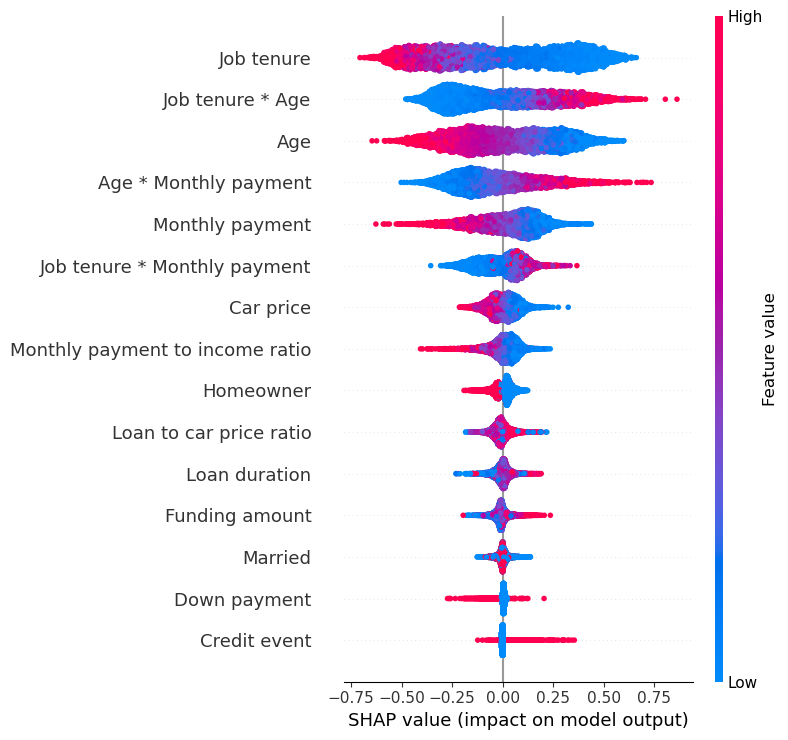

In [33]:
print(f"SHAP values shape: {shap_values.shape}")

# Visualize the SHAP summary plot for the second class (class 1)
shap.summary_plot(shap_values[:, :, 1], X_scaled, feature_names=X.columns)


# SHAP Summary Plot Interpretation

In the SHAP summary plot above, each dot represents the impact of a feature on the prediction for an individual sample. The plot displays how the feature values affect the model's output, which is a binary classification task (predicting car loan default, where 0 is no default and 1 is default). Let's break down the interpretation:

## 1. X-axis (SHAP Value)
The SHAP value on the x-axis shows how much each feature contributes to increasing or decreasing the probability of car loan default.  
- SHAP values to the left (negative) push the model's prediction towards no default (0), and SHAP values to the right (positive) push the model’s prediction towards default (1).

## 2. Y-axis (Features)
Features are ranked by their overall importance, with the most important features at the top. In this case:
- **Job tenure** is the most important feature affecting the prediction of car loan default.
- **Credit event** is the least important feature in this context.

## 3. Color of Dots (Feature Value)
The color of each dot represents the feature value:
- **Red dots** represent higher values of the feature.
- **Blue dots** represent lower values of the feature.

## 4. Interpretation of Key Features

### Job Tenure:
- **Higher job tenure (red)** reduces the likelihood of default (negative SHAP values).
- **Lower job tenure (blue)** increases the likelihood of default (positive SHAP values).
- This suggests that people with longer job tenure are less likely to default, which aligns with the idea that job stability can indicate financial stability.

### Job Tenure * Age (Interaction Term):
- **Older individuals with longer job tenure (red)** tend to have a lower chance of default.
- **Younger individuals with shorter job tenure (blue)** are more likely to default.

### Age:
- **Younger borrowers (blue)** are associated with a higher likelihood of default (positive SHAP values).
- **Older borrowers (red)** tend to have a lower chance of default.

### Age * Monthly Payment (Interaction Term):
- **High monthly payments for younger individuals (blue)** increase the likelihood of default.
- **Low monthly payments for older individuals (red)** decrease the likelihood of default.

### Monthly Payment:
- **Higher monthly payments (red)** increase the likelihood of default.
- **Lower payments (blue)** reduce the likelihood of default.

### Job Tenure * Monthly Payment (Interaction Term):
- **Low job tenure combined with high monthly payments (blue)** increases the likelihood of default.

### Car Price:
- **Higher car prices (red)** slightly increase the chance of default.
- **Lower car prices (blue)** are associated with a reduced likelihood of default.

### Monthly Payment to Income Ratio:
- Borrowers with a **high monthly payment to income ratio (red)** are more likely to default, while those with a **low ratio (blue)** are less likely to default.
- This makes sense because higher ratios mean the monthly payments take up a larger portion of their income.

### Homeowner:
- **Non-homeowners (blue)** are slightly more likely to default.

### Loan to Car Price Ratio:
- Borrowers with a **higher loan-to-car price ratio (red)** are more likely to default.
- This suggests that borrowers who finance a larger portion of the car’s value are at a greater risk of default.

### Loan Duration:
- **Longer loan durations (red)** slightly increase the likelihood of default, while shorter loans (blue) reduce it.

### Funding Amount:
- Borrowers with **higher funding amounts (red)** have a small increase in default likelihood.

### Married:
- **Married borrowers (blue)** are less likely to default, while those who are **not married (red)** have a higher likelihood of default.

### Down Payment:
- Borrowers with **higher down payments (red)** have a lower likelihood of default.
- **Lower down payments (blue)** increase the risk of default, which makes sense because a higher down payment reduces the overall loan amount.

### Credit Event:
- **A credit event (red)** is a significant risk factor, strongly increasing the likelihood of default.

## Conclusion
The SHAP plot provides clear insights into the most important features driving the predictions in the car loan default model. 
- **Job tenure**, **age**, **monthly payment**, and **monthly payment to income ratio** are key factors, with lower job tenure, younger age, higher monthly payments, and a higher payment-to-income ratio associated with a higher risk of default.
- Conversely, factors like being **married**, having **long job tenure**, and making **higher down payments** reduce the likelihood of default.


In [34]:
import matplotlib.pyplot as plt

# Save the SHAP summary plot for the second class (class 1)
shap.summary_plot(shap_values[:, :, 1], X_scaled, feature_names=X.columns, show=False)
plt.savefig("../Plots/shap_summary_plot.png")
plt.close()